#Clinic Data Analysis

*    Most Diagnosis Resolve in the CLinic
*    Ages of Patients Come in the Clinic
*    Compare Diagnosis With Age Groups

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
df = pd.read_csv('patients.csv')
df

,PatientID,Name,Age,Diagnosis,LabResult
0,1001,Patient_1,20,Diabetes,167
1,1002,Patient_2,74,Diabetes,153
2,1003,Patient_3,40,Hypertension,196
3,1004,Patient_4,23,NaN,157
4,1005,Patient_5,35,Diabetes,115
...,...,...,...,...,...
95,1096,Patient_96,40,Diabetes,96
96,1097,Patient_97,60,Diabetes,192
97,1098,Patient_98,45,Diabetes,88
98,1099,Patient_99,61,Common Cold,81


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PatientID  100 non-null    int64 
 1   Name       100 non-null    object
 2   Age        100 non-null    int64 
 3   Diagnosis  79 non-null     object
 4   LabResult  100 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


In [75]:
df.describe()

,PatientID,Age,LabResult
count,100.000000,100.000000,100.000000
mean,1050.500000,48.220000,140.340000
std,29.011492,17.538172,36.387149
min,1001.000000,20.000000,80.000000
25%,1025.750000,35.750000,108.000000
50%,1050.500000,47.000000,137.000000
75%,1075.250000,62.250000,172.000000
max,1100.000000,78.000000,199.000000


In [76]:
df.isnull().sum()

,0
PatientID,0
Name,0
Age,0
Diagnosis,21
LabResult,0


In [77]:
missing_percentage = (df.isnull().sum() / len(df)) * 100


missing_percentage

,0
PatientID,0.0
Name,0.0
Age,0.0
Diagnosis,21.0
LabResult,0.0


In [78]:
df.drop(['Name','PatientID'], axis=1 , inplace=True)


In [79]:
df

,Age,Diagnosis,LabResult
0,20,Diabetes,167
1,74,Diabetes,153
2,40,Hypertension,196
3,23,NaN,157
4,35,Diabetes,115
...,...,...,...
95,40,Diabetes,96
96,60,Diabetes,192
97,45,Diabetes,88
98,61,Common Cold,81


In [80]:
df.dropna(inplace=True)

In [81]:
df

,Age,Diagnosis,LabResult
0,20,Diabetes,167
1,74,Diabetes,153
2,40,Hypertension,196
4,35,Diabetes,115
5,54,Flu,98
...,...,...,...
94,75,Flu,108
95,40,Diabetes,96
96,60,Diabetes,192
97,45,Diabetes,88


#Age Range


In [82]:
sorted(df['Age'].unique())

[np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(42),
 np.int64(44),
 np.int64(45),
 np.int64(47),
 np.int64(49),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(57),
 np.int64(60),
 np.int64(61),
 np.int64(62),
 np.int64(63),
 np.int64(67),
 np.int64(70),
 np.int64(71),
 np.int64(74),
 np.int64(75),
 np.int64(76),
 np.int64(77),
 np.int64(78)]

In [83]:
# prompt: new_colums = ['Young','Middle','Old'] 18-35 , 36-60 ,61-100 write a code

def age_group(age):
    if 18 <= age <= 35:
        return 'Young'
    elif 36 <= age <= 60:
        return 'Middle'
    elif 61 <= age <= 100:
        return 'Old'
    else:
        return 'Unknown'  # Handle ages outside the specified ranges

df['Age_Group'] = df['Age'].apply(age_group)
df


,Age,Diagnosis,LabResult,Age_Group
0,20,Diabetes,167,Young
1,74,Diabetes,153,Old
2,40,Hypertension,196,Middle
4,35,Diabetes,115,Young
5,54,Flu,98,Middle
...,...,...,...,...
94,75,Flu,108,Old
95,40,Diabetes,96,Middle
96,60,Diabetes,192,Middle
97,45,Diabetes,88,Middle


In [85]:
df['Age_Group'].value_counts()

,count
Age_Group,
Middle,41
Young,20
Old,18


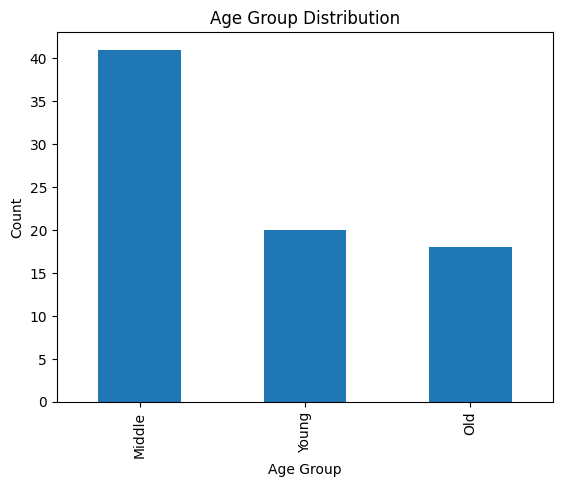

In [94]:
df['Age_Group'].value_counts().plot(kind='bar' )
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

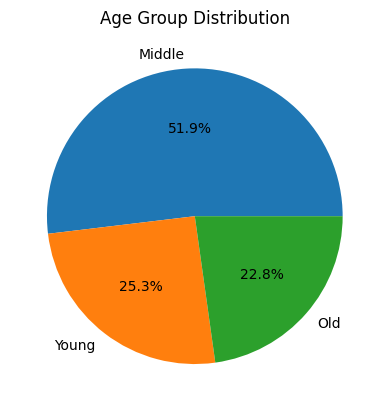

In [90]:
# prompt: Make pie Chart to display Age_Group is library is imported as well

df['Age_Group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Age Group Distribution')
plt.ylabel('') # Remove the y-axis label
plt.show()


#Most Diagnosis

In [101]:
df['Diagnosis'].nunique()

4

In [102]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
Flu,27
Diabetes,26
Common Cold,14
Hypertension,12


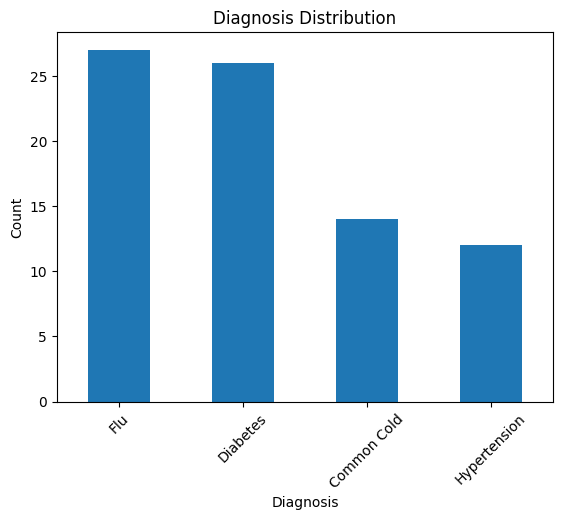

In [104]:
df['Diagnosis'].value_counts().plot(kind='bar')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

#Comparsing With Age Groups

In [96]:
analysis = df.groupby('Age_Group')['Diagnosis'].value_counts()
print(analysis)

Age_Group  Diagnosis   
Middle     Flu             15
           Diabetes        14
           Hypertension     7
           Common Cold      5
Old        Common Cold      6
           Diabetes         6
           Flu              5
           Hypertension     1
Young      Flu              7
           Diabetes         6
           Hypertension     4
           Common Cold      3
Name: count, dtype: int64


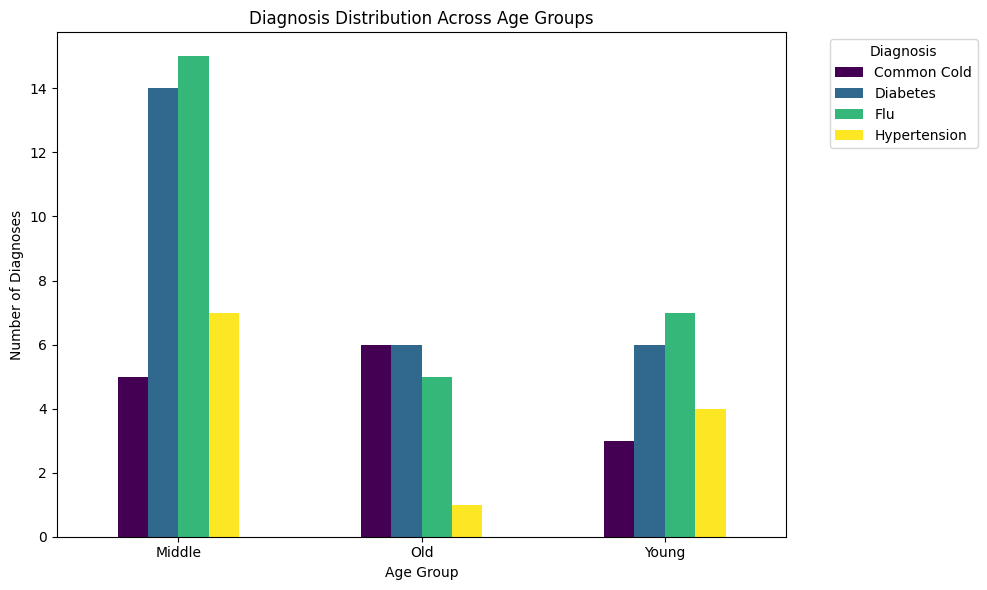

In [100]:
analysis = df.groupby('Age_Group')['Diagnosis'].value_counts().unstack()

analysis.plot(kind='bar', figsize=(10, 6), colormap='viridis') # Using a colormap for different colors
plt.title('Diagnosis Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Diagnoses')
plt.xticks(rotation=0) # Rotate x-axis labels for better readability
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


#Conclusion
*   Most Diagnosis Resolve in the CLinic

"Flu" is the highest rate 27 and "Hypertation" in low with 12 rate

*   Ages of Patients Come in the Clinic

"Middle Age" Guy between 36-60 age group

*   Compare Diagnosis With Age Groups

"Flu and Diabetes" Are most common in middle age_group people and than Old Age Group has "Diabetes and Common Cold" Are so  common and young has "Flu and Diabetes" are so common.